In [139]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime,timedelta
df1 = pd.read_csv('/Users/niharpatel/Desktop/Untitled Folder/TestData.csv')

In [140]:
df1['date'] = pd.to_datetime(df1['date'])

In [141]:
def date_timeStamp(x):
    timestamp=[]
    for i in range(len(x)):
        timestamp.append(datetime.timestamp(x['date'][i]))
    return timestamp

x = date_timeStamp(df1)

In [142]:
df1['timestamp'] = x    

In [143]:
df1.drop(columns = ['Unnamed: 0'], inplace = True)

In [144]:
df1.set_index(df1['date'],inplace = True)
df1.drop(columns = ['date'], inplace = True)

In [145]:
df1.head()

open        close          low         high  \
date                                                                      
2020-01-02 09:00:00  1541.130000  1547.777449  1536.242463  1552.664986   
2020-01-02 09:05:00  1547.777449  1550.119675  1535.531174  1562.365950   
2020-01-02 09:10:00  1550.119675  1555.196241  1541.053843  1564.262073   
2020-01-02 09:15:00  1555.196241  1562.850000  1547.670809  1570.375432   
2020-01-02 09:20:00  1562.850000  1565.715472  1557.312400  1571.253072   

                        timestamp  
date                               
2020-01-02 09:00:00  1.577936e+09  
2020-01-02 09:05:00  1.577936e+09  
2020-01-02 09:10:00  1.577936e+09  
2020-01-02 09:15:00  1.577937e+09  
2020-01-02 09:20:00  1.577937e+09

In [146]:
resampled_data = df1.resample('5Min', closed='right', label='right').agg({'open': 'first',
                                                                         'high': 'max',
                                                                         'low': 'min',
                                                                         'close': 'last'}).dropna()
resampled_data

open          high           low         close
date                                                                       
2020-01-02 09:00:00   1541.130000   1552.664986   1536.242463   1547.777449
2020-01-02 09:05:00   1547.777449   1562.365950   1535.531174   1550.119675
2020-01-02 09:10:00   1550.119675   1564.262073   1541.053843   1555.196241
2020-01-02 09:15:00   1555.196241   1570.375432   1547.670809   1562.850000
2020-01-02 09:20:00   1562.850000   1571.253072   1557.312400   1565.715472
...                           ...           ...           ...           ...
2021-02-24 14:35:00  29292.257173  29913.359020  29130.933279  29752.035126
2021-02-24 14:40:00  29752.035126  29757.242607  29534.733980  29539.941461
2021-02-24 14:45:00  29539.941461  29599.497431  29539.576870  29599.132840
2021-02-24 14:50:00  29599.132840  30012.386336  29436.477258  29849.730754
2021-02-24 14:55:00  29849.730754  30319.152589  29640.927511  30110.349346

[21595 rows x 4 columns]

In [147]:
import numpy as np
from scipy.signal import argrelextrema

def get_max_min(prices, smoothing, window_range):
    smooth_prices = prices['close'].rolling(window=smoothing).mean().dropna()
    local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    local_min = argrelextrema(smooth_prices.values, np.less)[0]
    price_local_max_dt = []
    for i in local_max:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_max_dt.append(prices.iloc[i-window_range:i+window_range]['close'].idxmax())
    price_local_min_dt = []
    for i in local_min:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_min_dt.append(prices.iloc[i-window_range:i+window_range]['close'].idxmin())  
    maxima = pd.DataFrame(prices.loc[price_local_max_dt])
    minima = pd.DataFrame(prices.loc[price_local_min_dt])
    max_min = pd.concat([maxima, minima]).sort_index()
    max_min.index.name = 'date'
    max_min = max_min.reset_index()
    max_min = max_min[~max_min.date.duplicated()]
    p = prices.reset_index()  
    print(p)
    max_min['day_num'] = p[p['date'].isin(max_min.date)].index.values
    max_min = max_min.set_index('day_num')['close']
    
    return max_min

smoothing = 3
window = 10

minmax = get_max_min(df1, smoothing, window)
minmax

                     date          open         close           low  \
0     2020-01-02 09:00:00   1541.130000   1547.777449   1536.242463   
1     2020-01-02 09:05:00   1547.777449   1550.119675   1535.531174   
2     2020-01-02 09:10:00   1550.119675   1555.196241   1541.053843   
3     2020-01-02 09:15:00   1555.196241   1562.850000   1547.670809   
4     2020-01-02 09:20:00   1562.850000   1565.715472   1557.312400   
...                   ...           ...           ...           ...   
21590 2021-02-24 14:35:00  29292.257173  29752.035126  29130.933279   
21591 2021-02-24 14:40:00  29752.035126  29539.941461  29534.733980   
21592 2021-02-24 14:45:00  29539.941461  29599.132840  29539.576870   
21593 2021-02-24 14:50:00  29599.132840  29849.730754  29436.477258   
21594 2021-02-24 14:55:00  29849.730754  30110.349346  29640.927511   

               high     timestamp  
0       1552.664986  1.577936e+09  
1       1562.365950  1.577936e+09  
2       1564.262073  1.577936e+09  
3  

day_num
8         1585.943274
15        1660.967190
24        1686.110627
37        1563.921082
53        1462.780147
             ...     
21546    32112.569132
21547    32276.419165
21558    31592.901707
21573    29501.285999
21578    30552.329715
Name: close, Length: 1802, dtype: float64

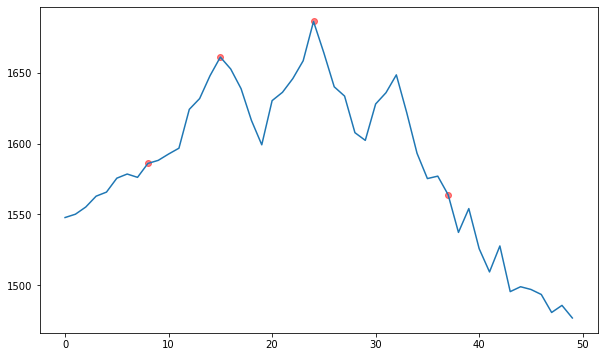

In [148]:
plt.figure(figsize=(10,6))
resampled_data.reset_index()['close'][:50].plot()
plt.scatter(minmax.index[:4],minmax.values[:4],color='red',alpha = 0.5)

In [182]:
from collections import defaultdict

def Reverse_Head_Shoulder(max_min):  
    patterns = defaultdict(list)
    
    # Window range is 5 units
    for i in range(5, len(max_min)):  
        window = max_min.iloc[i-5:i]
        
        # Pattern must play out in less than n units
        if window.index[-1] - window.index[0] > 100:      
            continue   
            
        a, b, c, d, e = window.iloc[0:5]
                
        # RHS
        if a<b and c<a and c<e and c<d and e<d and abs(b-d)<=np.mean([b,d])*0.02:
               patterns['RHS'].append((window.index[0], window.index[-1]))
        
    return patterns

def Double_Top(max_min):  
    patterns = defaultdict(list)
    for i in range(5, len(max_min)):  
        window = max_min.iloc[i-5:i]
        
        if window.index[-1] - window.index[0] > 100:      
            continue   
            
        a, b, c, d, e = window.iloc[0:5]
                
        # Double TOP
        if a<b and a<c and c<b and c<d and e<d and e<c and abs(b-d)>=np.mean([b,d])*0.02:
               patterns['DT'].append((window.index[0], window.index[-1]))
        
    return patterns


def Double_Bottom(max_min):  
    patterns = defaultdict(list)
    for i in range(5, len(max_min)):  
        window = max_min.iloc[i-5:i]
        
        if window.index[-1] - window.index[0] > 100:      
            continue   
            
        a, b, c, d, e = window.iloc[0:5]
                
        # Double Bottom
        if b<a and c<a and c<e and d<c and d<e and b<c and abs(b-d)>=np.mean([b,d])*0.02:
               patterns['DB'].append((window.index[0], window.index[-1]))
        
    return patterns

def Head_Shoulder(max_min):  
    patterns = defaultdict(list)
    for i in range(5, len(max_min)):  
        window = max_min.iloc[i-5:i]
        
        if window.index[-1] - window.index[0] > 100:      
            continue   
            
        a, b, c, d, e = window.iloc[0:5]
                
        # Head_Shoulder
        if b<a and a<c and e<c and d<c and d<e and abs(b-d)<=np.mean([b,d])*0.02:
               patterns['HS'].append((window.index[0], window.index[-1]))
        
    return patterns



patterns = Reverse_Head_Shoulder(minmax)
patterns

defaultdict(list,
            {'RHS': [(635, 708),
              (3121, 3181),
              (3234, 3279),
              (3664, 3709),
              (4565, 4598),
              (4839, 4863),
              (7785, 7846),
              (10785, 10833),
              (11465, 11494),
              (14647, 14693),
              (14693, 14759),
              (14817, 14850),
              (14850, 14886),
              (16233, 16266),
              (16637, 16687),
              (17045, 17088),
              (17754, 17801),
              (17923, 17964),
              (18327, 18372),
              (18621, 18670),
              (19389, 19435),
              (19449, 19510),
              (19939, 19972),
              (21129, 21174)]})

EMA = Exponential Moving average

In [183]:
def plot_minmax_patterns(prices, max_min, patterns, window, ema):
    
    incr = str((prices.index[1] - prices.index[0]).seconds/60)
    
    if len(patterns) == 0:
        pass
    else:
        num_pat = len([x for x in patterns.items()][0][1])
        f, axes = plt.subplots(1, 2, figsize=(16, 5))
        axes = axes.flatten()
        prices_ = prices.reset_index()['close']
        axes[0].plot(prices_)
        axes[0].scatter(max_min.index, max_min, s=100, alpha=.3, color='orange')
        axes[1].plot(prices_)
        for name, end_day_nums in patterns.items():
            for i, tup in enumerate(end_day_nums):
                sd = tup[0]
                ed = tup[1]
                axes[1].scatter(max_min.loc[sd:ed].index,
                              max_min.loc[sd:ed].values,
                              s=200, alpha=.3)
                plt.yticks([])
        plt.tight_layout()
        plt.title('{}: EMA {}, Window {} ({} patterns)'.format( incr, ema, window, num_pat))



In [184]:
def get_results(prices, max_min, pat, ema_, window_):
    
    incr = str((prices.index[1] - prices.index[0]).seconds/60)
    
    #fw_list = [1, 12, 24, 36] 
    fw_list = [1, 2, 3]
    results = []
    if len(pat.items()) > 0:
        end_dates = [v for k, v in pat.items()][0]      
        for date in end_dates:  
            param_res = {
                         'increment': incr,
                         'ema': ema_,
                         'window': window_, 
                         'date': date}
            for x in fw_list:
                returns = (prices['close'].pct_change(x).shift(-x).reset_index(drop=True).dropna())
                try:
                    param_res['fw_ret_{}'.format(x)] = returns.loc[date[1]]   
                except Exception as e:
                    param_res['fw_ret_{}'.format(x)] = e
            results.append(param_res)  
    else:
        param_res = {
                     'increment': incr,
                     'ema': ema_,
                     'window': window_,
                     'date': None}
        for x in fw_list:
            param_res['fw_ret_{}'.format(x)] = None   
        results.append(param_res)
    return pd.DataFrame(results)



In [185]:
def Identifier(stock_data, ema_list, window_list, plot, results):
    
    all_results = pd.DataFrame()
    prices = stock_data
    
    for ema_ in ema_list:
            for window_ in window_list: 
                max_min = get_max_min(prices, smoothing=ema_, window_range=window_)
                pat = Head_Shoulder(max_min)
                
                if plot == True:
                    plot_minmax_patterns(prices, max_min, pat, window_, ema_)
                    
                if results == True:
                    all_results = pd.concat([all_results, get_results(prices, max_min, pat, ema_, window_)], axis=0)    
                
    if results == True:
        return all_results.reset_index(drop=True)
    

                     date          open          high           low  \
0     2020-01-02 09:00:00   1541.130000   1552.664986   1536.242463   
1     2020-01-02 09:05:00   1547.777449   1562.365950   1535.531174   
2     2020-01-02 09:10:00   1550.119675   1564.262073   1541.053843   
3     2020-01-02 09:15:00   1555.196241   1570.375432   1547.670809   
4     2020-01-02 09:20:00   1562.850000   1571.253072   1557.312400   
...                   ...           ...           ...           ...   
21590 2021-02-24 14:35:00  29292.257173  29913.359020  29130.933279   
21591 2021-02-24 14:40:00  29752.035126  29757.242607  29534.733980   
21592 2021-02-24 14:45:00  29539.941461  29599.497431  29539.576870   
21593 2021-02-24 14:50:00  29599.132840  30012.386336  29436.477258   
21594 2021-02-24 14:55:00  29849.730754  30319.152589  29640.927511   

              close  
0       1547.777449  
1       1550.119675  
2       1555.196241  
3       1562.850000  
4       1565.715472  
...            

                     date          open          high           low  \
0     2020-01-02 09:00:00   1541.130000   1552.664986   1536.242463   
1     2020-01-02 09:05:00   1547.777449   1562.365950   1535.531174   
2     2020-01-02 09:10:00   1550.119675   1564.262073   1541.053843   
3     2020-01-02 09:15:00   1555.196241   1570.375432   1547.670809   
4     2020-01-02 09:20:00   1562.850000   1571.253072   1557.312400   
...                   ...           ...           ...           ...   
21590 2021-02-24 14:35:00  29292.257173  29913.359020  29130.933279   
21591 2021-02-24 14:40:00  29752.035126  29757.242607  29534.733980   
21592 2021-02-24 14:45:00  29539.941461  29599.497431  29539.576870   
21593 2021-02-24 14:50:00  29599.132840  30012.386336  29436.477258   
21594 2021-02-24 14:55:00  29849.730754  30319.152589  29640.927511   

              close  
0       1547.777449  
1       1550.119675  
2       1555.196241  
3       1562.850000  
4       1565.715472  
...            

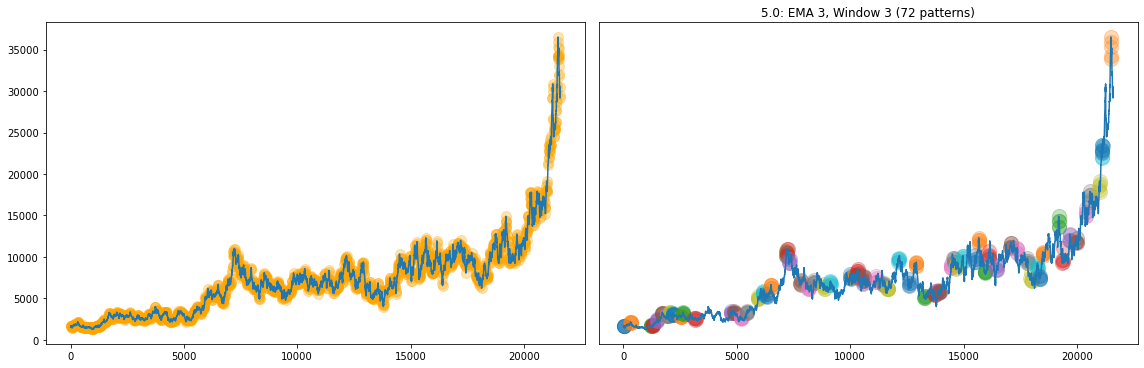

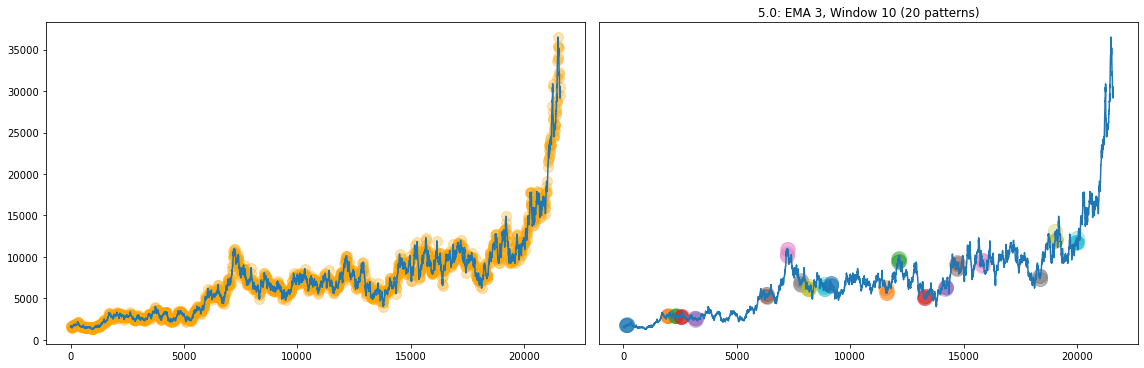

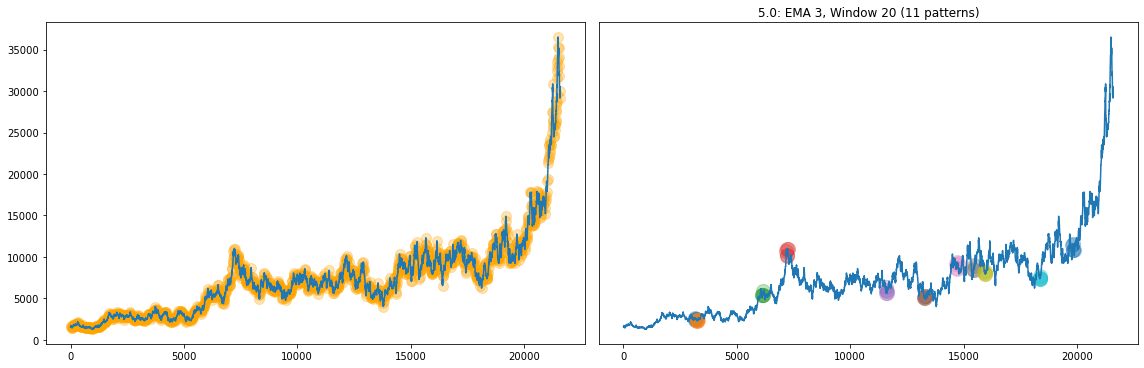

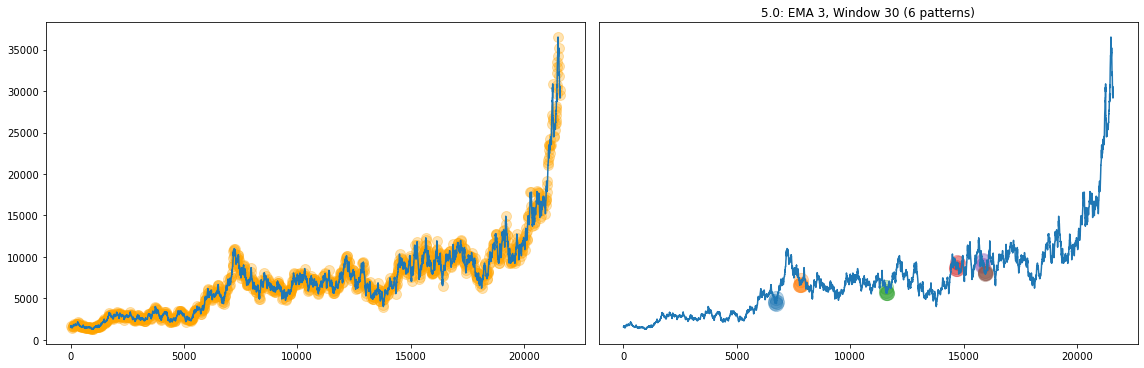

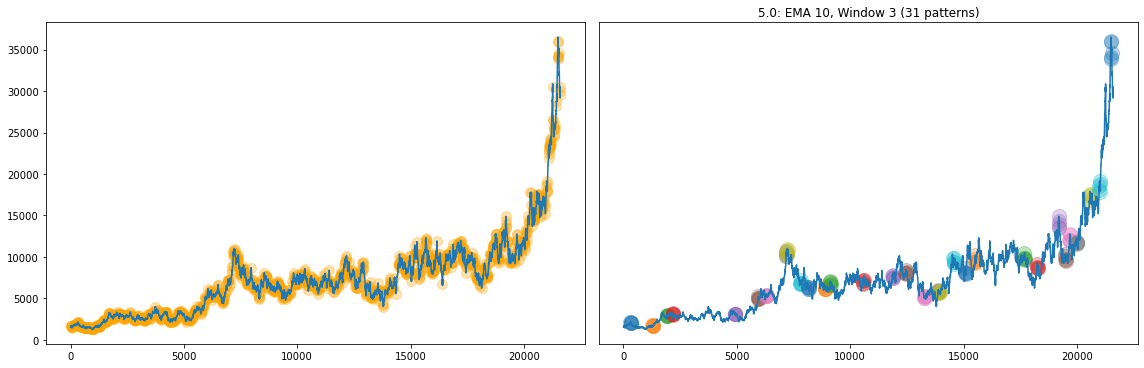

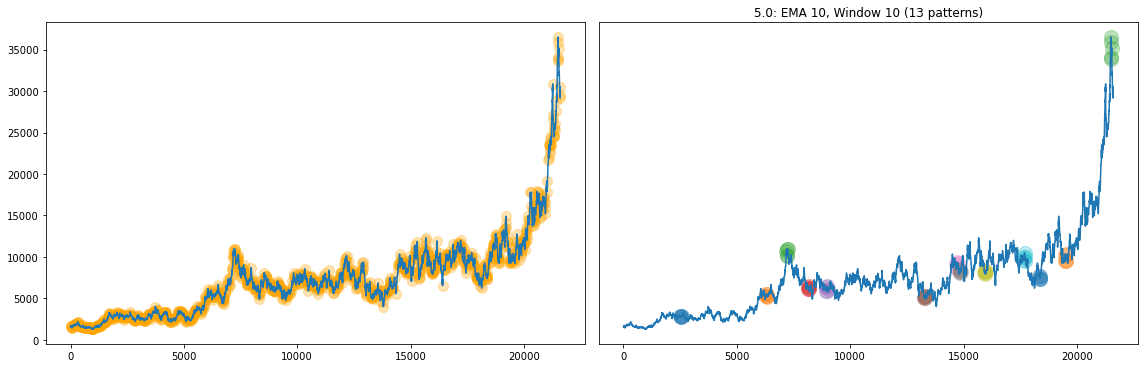

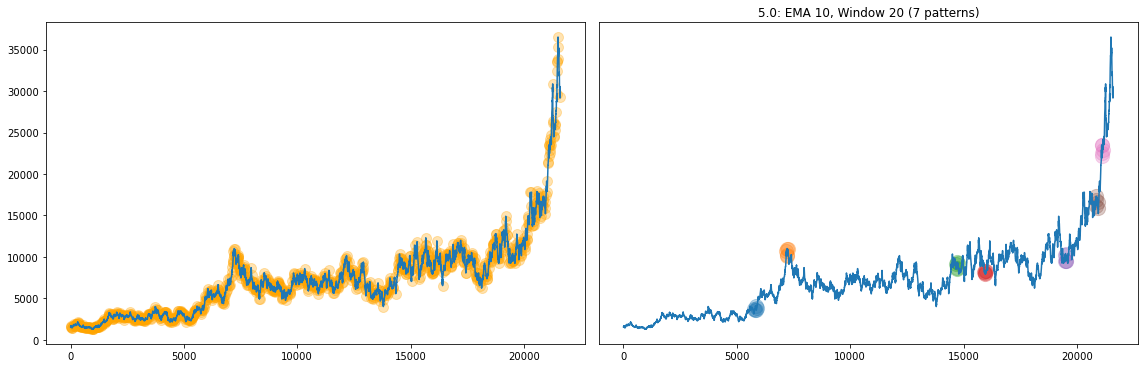

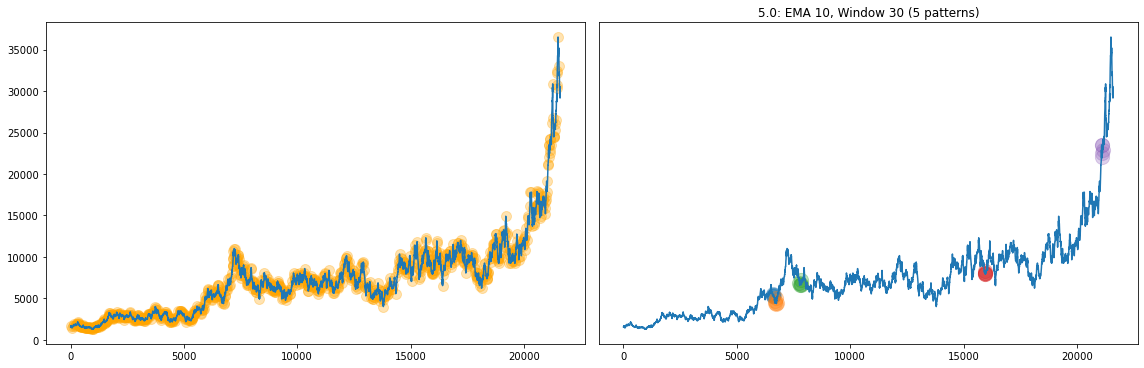

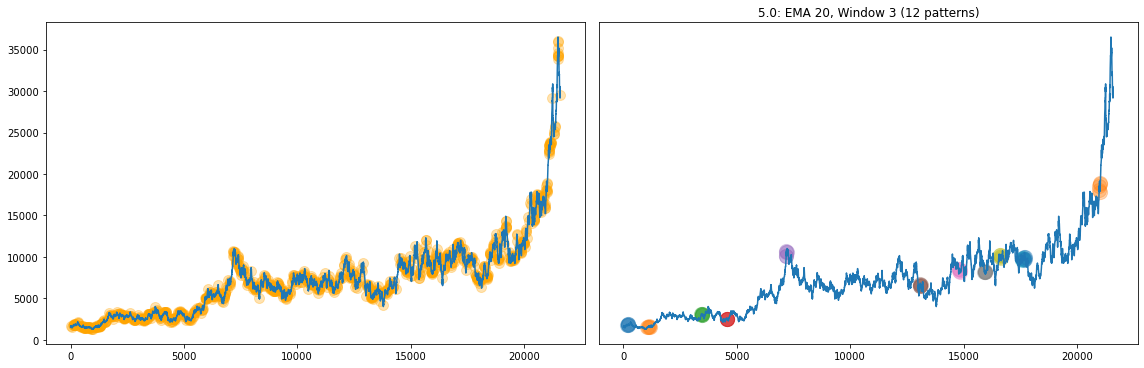

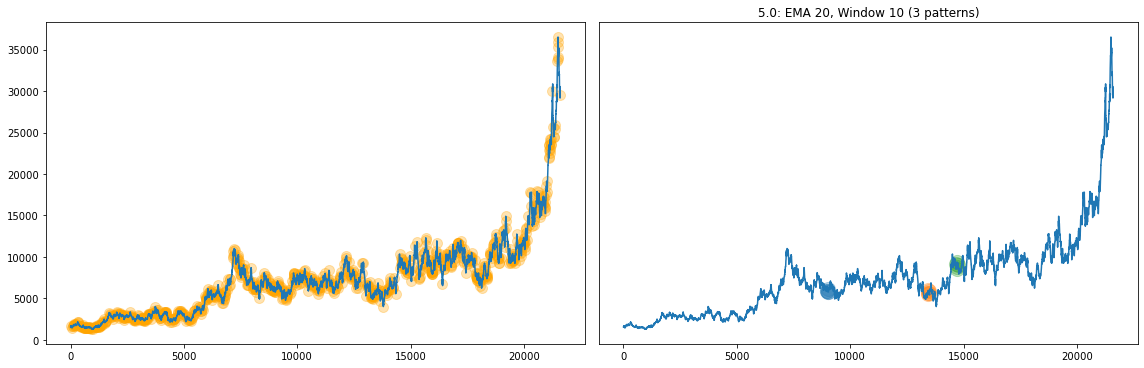

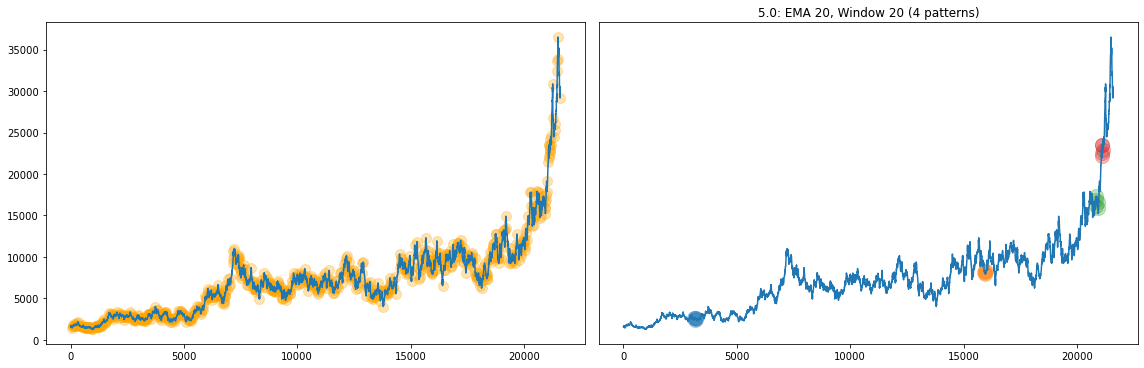

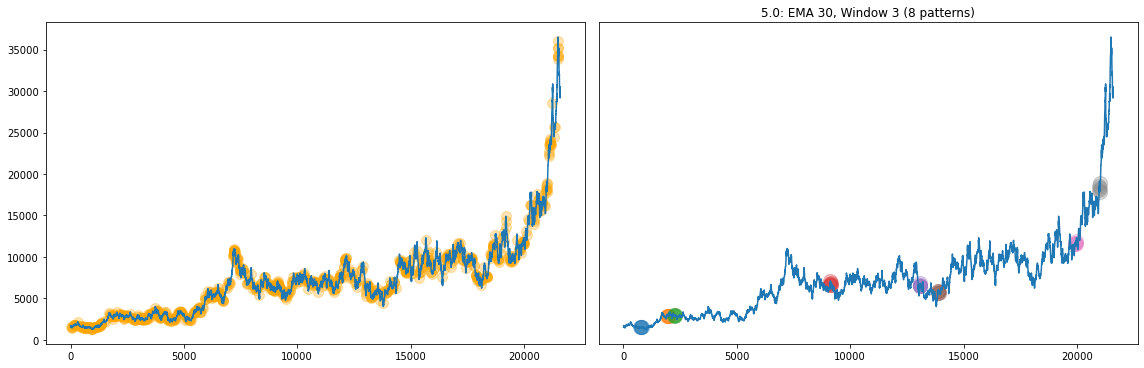

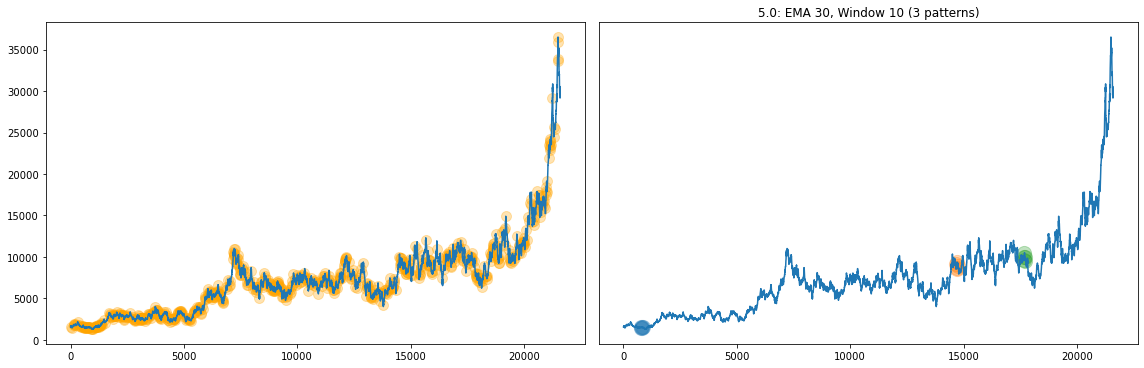

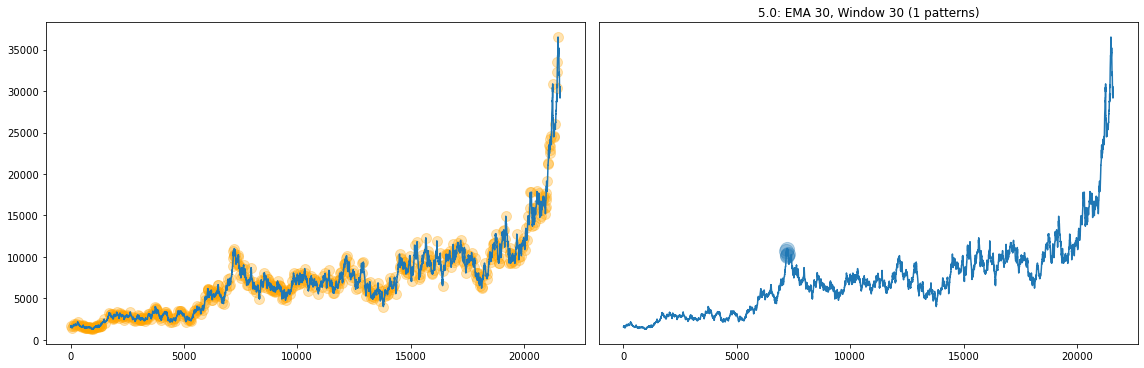

In [186]:
ema_list= [3,10,20,30,]
window_list = [3,10,20,30,]

results = Identifier(resampled_data,ema_list,window_list,plot=True,results=True)

In [187]:
def Identifier_X(stock_data, ema_list, window_list, plot, results, Name):
    
    all_results = pd.DataFrame()
    prices = stock_data
    
    for ema_ in ema_list:
            for window_ in window_list: 
                max_min = get_max_min(prices, smoothing=ema_, window_range=window_)
                if(Name=='RHS'):
                    pat = Reverse_Head_Shoulder(max_min)
                elif(Name=='DB'):
                    pat = Double_Bottom(max_min)
                elif(Name=='DT'):
                    pat = Double_Top(max_min)
                elif(Name=='HS'):
                    pat = Head_Shoulder(max_min)
                if plot == True:
                    plot_minmax_patterns(prices, max_min, pat, window_, ema_)
                    
                if results == True:
                    all_results = pd.concat([all_results, get_results(prices, max_min, pat, ema_, window_)], axis=0)    
                
    if results == True:
        return all_results.reset_index(drop=True)
    

                     date          open          high           low  \
0     2020-01-02 09:00:00   1541.130000   1552.664986   1536.242463   
1     2020-01-02 09:05:00   1547.777449   1562.365950   1535.531174   
2     2020-01-02 09:10:00   1550.119675   1564.262073   1541.053843   
3     2020-01-02 09:15:00   1555.196241   1570.375432   1547.670809   
4     2020-01-02 09:20:00   1562.850000   1571.253072   1557.312400   
...                   ...           ...           ...           ...   
21590 2021-02-24 14:35:00  29292.257173  29913.359020  29130.933279   
21591 2021-02-24 14:40:00  29752.035126  29757.242607  29534.733980   
21592 2021-02-24 14:45:00  29539.941461  29599.497431  29539.576870   
21593 2021-02-24 14:50:00  29599.132840  30012.386336  29436.477258   
21594 2021-02-24 14:55:00  29849.730754  30319.152589  29640.927511   

              close  
0       1547.777449  
1       1550.119675  
2       1555.196241  
3       1562.850000  
4       1565.715472  
...            

                     date          open          high           low  \
0     2020-01-02 09:00:00   1541.130000   1552.664986   1536.242463   
1     2020-01-02 09:05:00   1547.777449   1562.365950   1535.531174   
2     2020-01-02 09:10:00   1550.119675   1564.262073   1541.053843   
3     2020-01-02 09:15:00   1555.196241   1570.375432   1547.670809   
4     2020-01-02 09:20:00   1562.850000   1571.253072   1557.312400   
...                   ...           ...           ...           ...   
21590 2021-02-24 14:35:00  29292.257173  29913.359020  29130.933279   
21591 2021-02-24 14:40:00  29752.035126  29757.242607  29534.733980   
21592 2021-02-24 14:45:00  29539.941461  29599.497431  29539.576870   
21593 2021-02-24 14:50:00  29599.132840  30012.386336  29436.477258   
21594 2021-02-24 14:55:00  29849.730754  30319.152589  29640.927511   

              close  
0       1547.777449  
1       1550.119675  
2       1555.196241  
3       1562.850000  
4       1565.715472  
...            

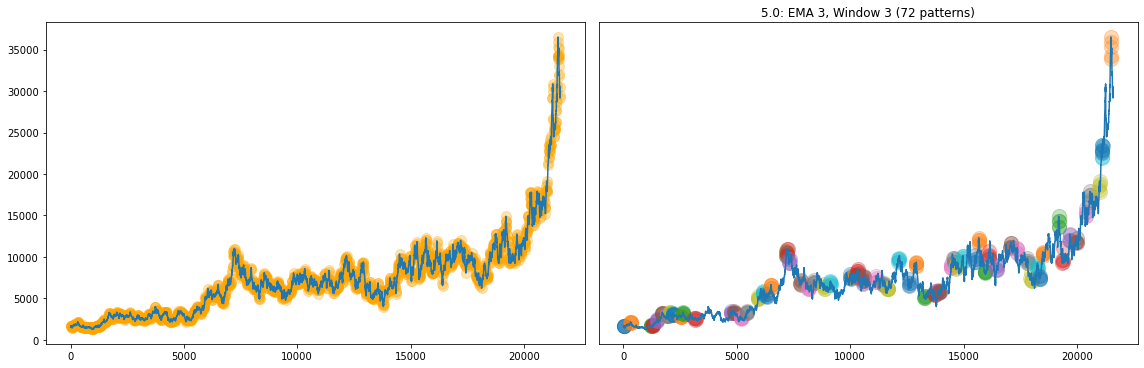

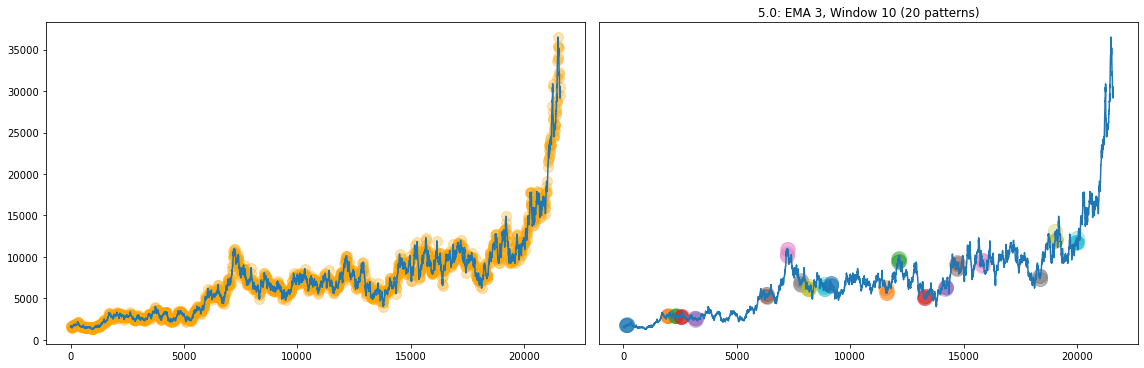

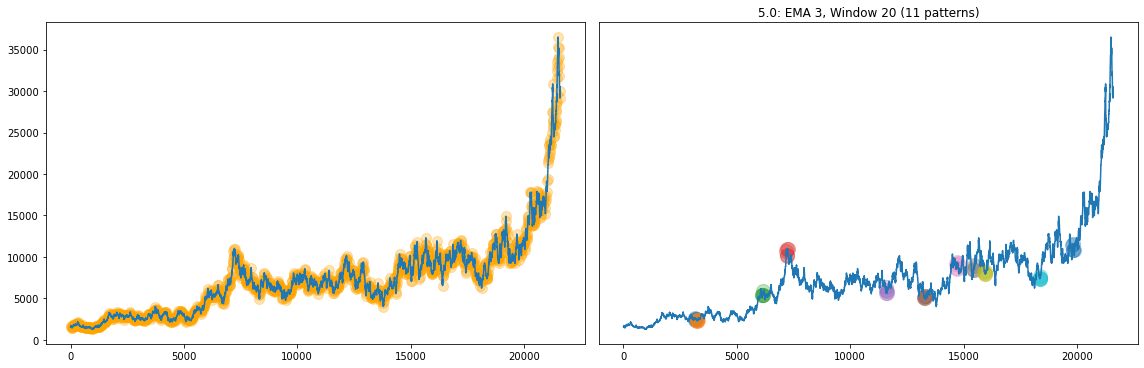

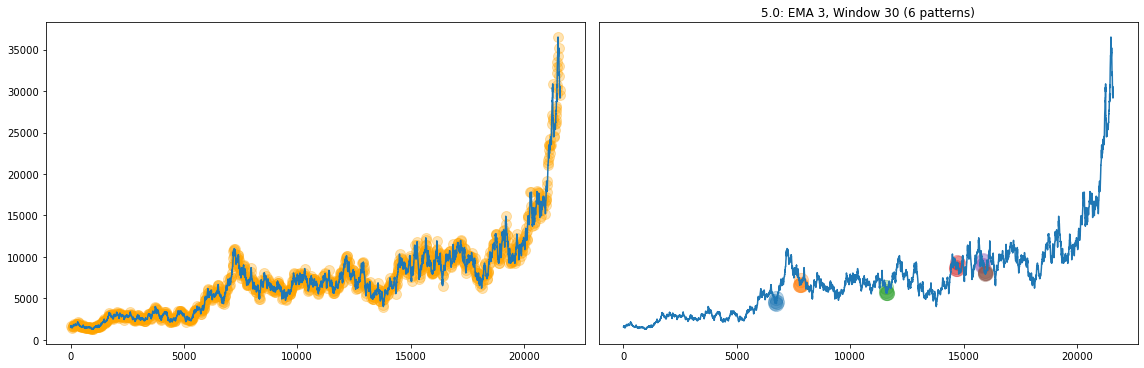

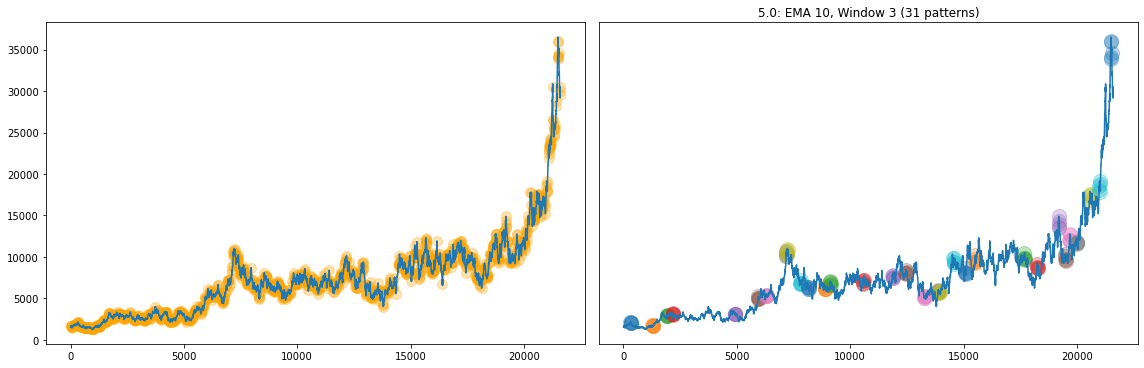

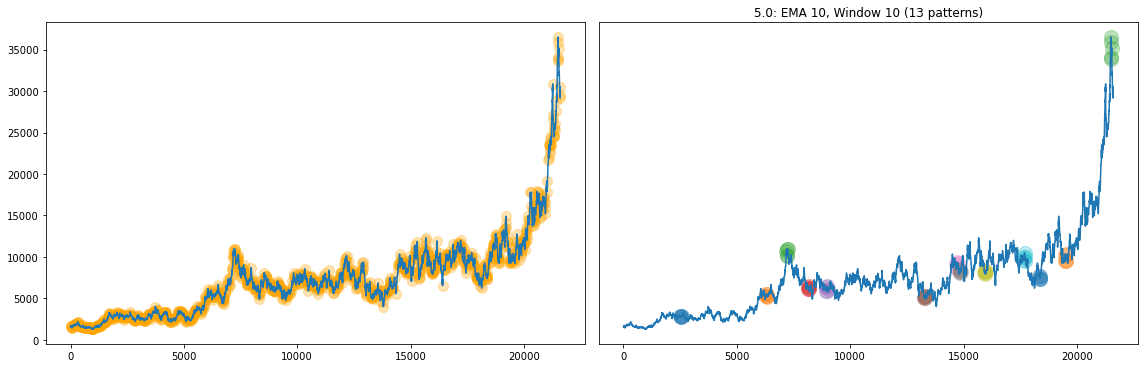

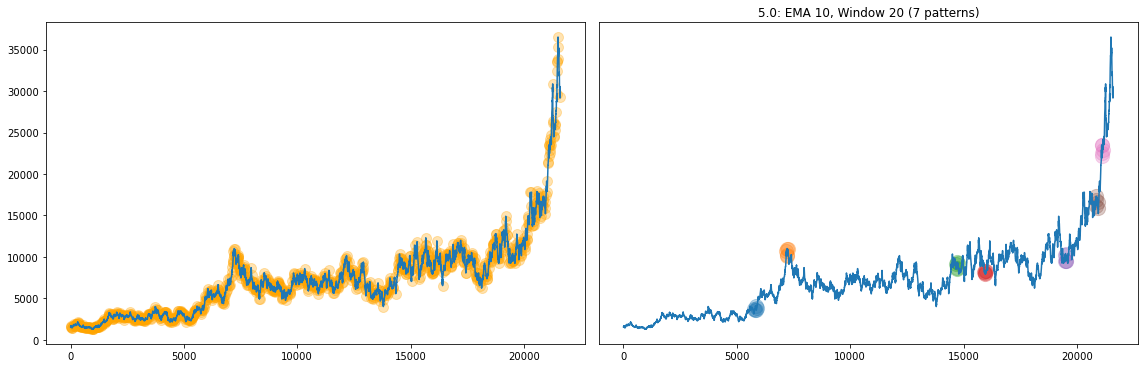

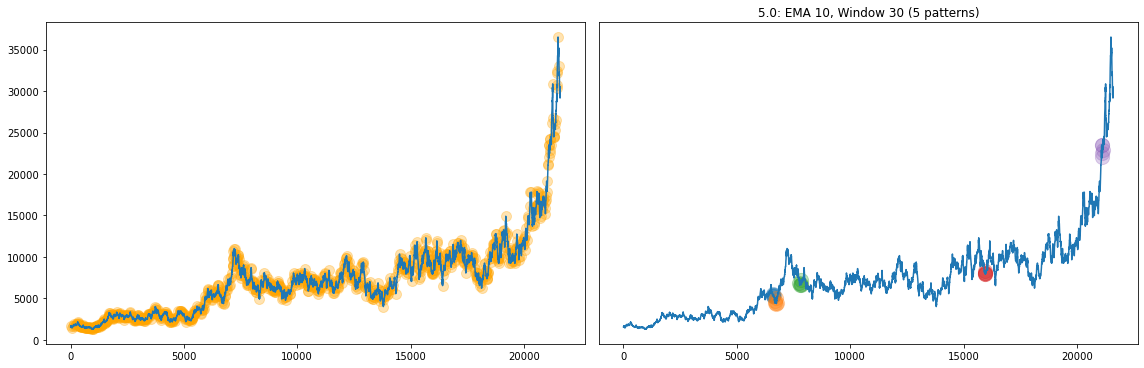

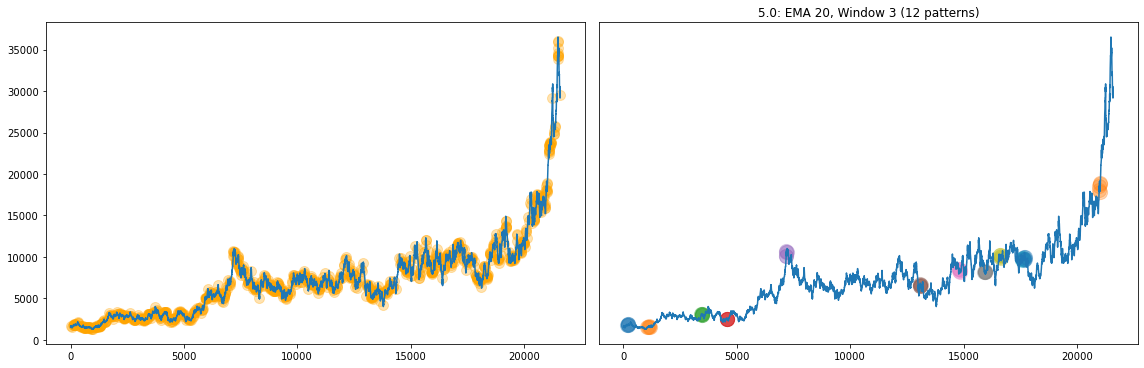

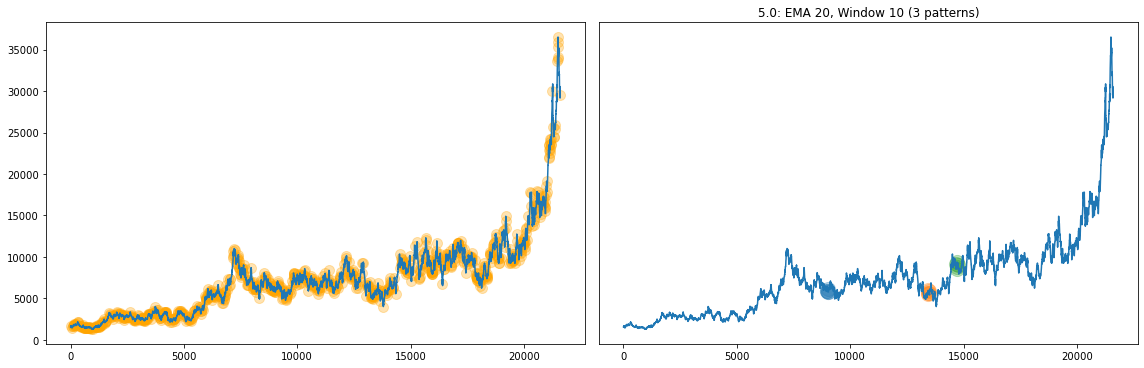

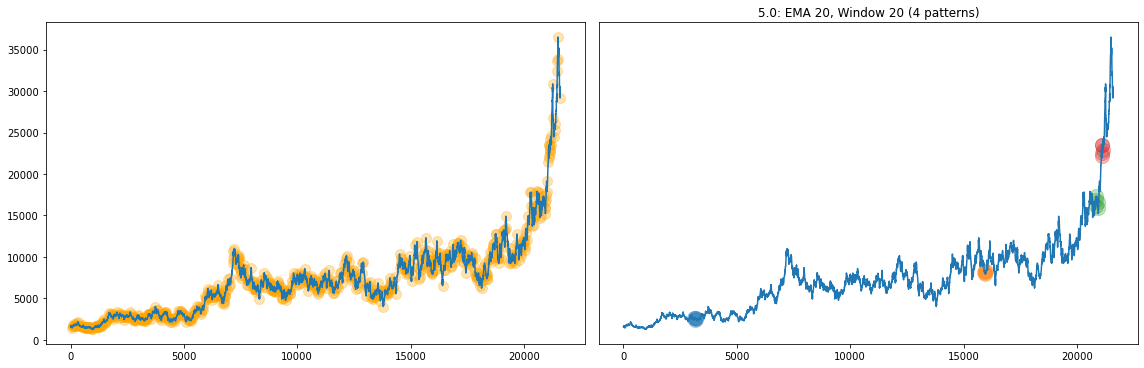

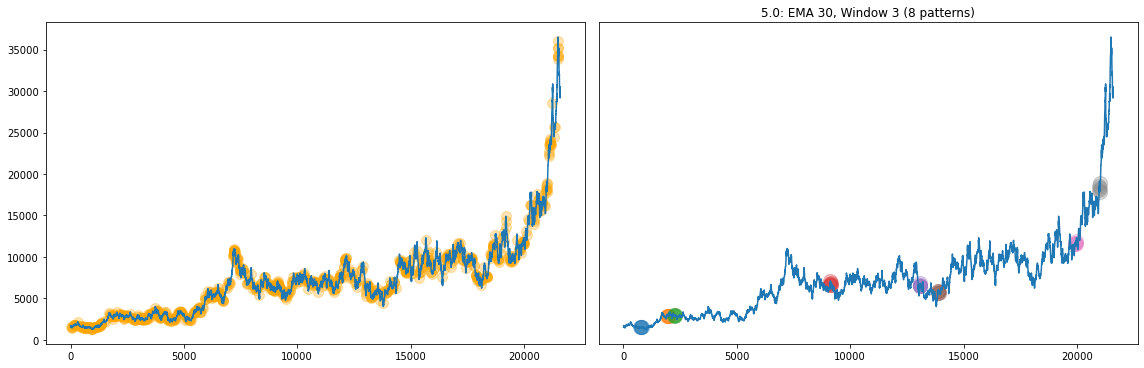

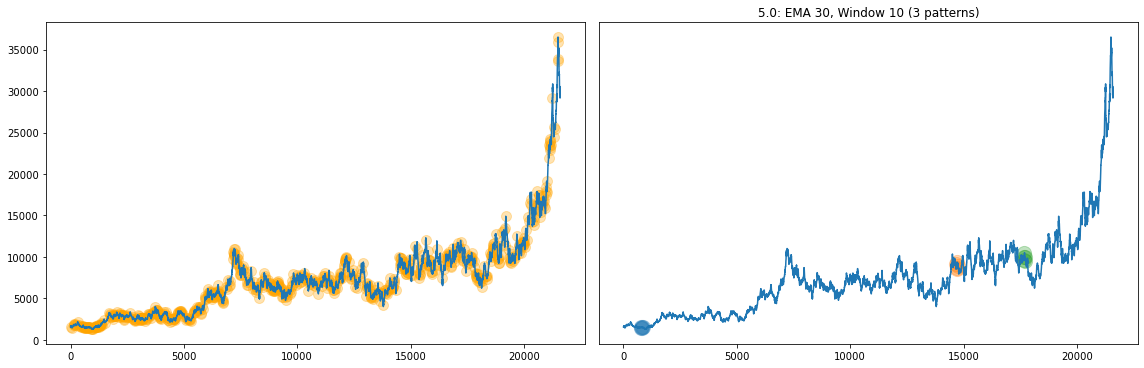

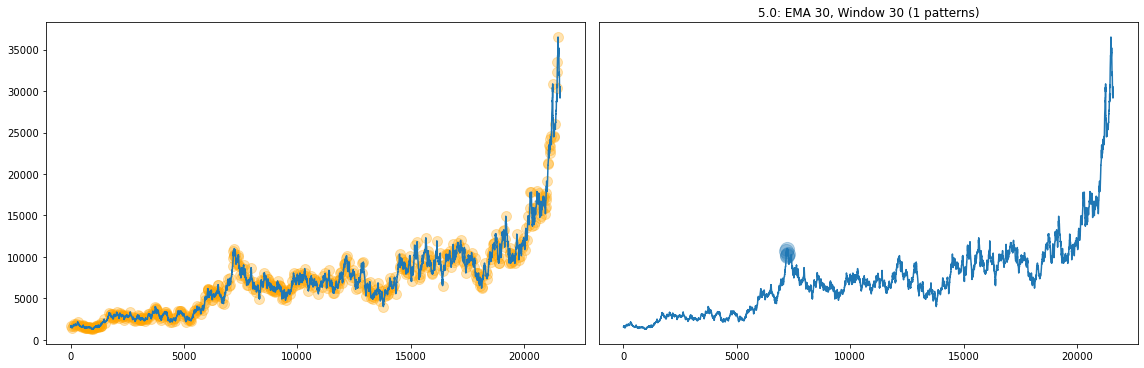

In [188]:
ema_list= [3,10,20,30,]
window_list = [3,10,20,30]
results_Mul = Identifier_X(resampled_data,ema_list,window_list,plot=True,results=True,Name='HS')

In [189]:
results_Mul.head(100)

increment  ema  window            date  fw_ret_1  fw_ret_2  fw_ret_3
0        5.0    3       3        (15, 32)  -0.01612  -0.03358 -0.044386
1        5.0    3       3      (309, 326) -0.004974  -0.00788 -0.017881
2        5.0    3       3    (1211, 1237) -0.002365 -0.008029 -0.010993
3        5.0    3       3    (1277, 1296)   0.00021  0.003174  0.003154
4        5.0    3       3    (1473, 1489) -0.013064 -0.025607 -0.022454
..       ...  ...     ...             ...       ...       ...       ...
95       5.0    3      20    (7185, 7246) -0.000546  -0.00351 -0.005941
96       5.0    3      20  (11559, 11638)  0.005519   0.01128   0.02415
97       5.0    3      20  (13248, 13301) -0.009015 -0.012799 -0.015429
98       5.0    3      20  (14679, 14754) -0.006818 -0.005914 -0.012247
99       5.0    3      20  (15436, 15494)  0.002826  0.006675  0.010416

[100 rows x 7 columns]